In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# hyperbolic tangent function
def func_tanh(z,a,b,c,d):
    '''
    a = dz transitional
    b = dz range
    c = maximum slope
    d = depth where dz transitional should be applied
    '''
    return a + b * (np.tanh(c/b * (d-z)))

## Find dz

In [3]:
# initial guesses
h_max = 500. # mximum depth
a = 17.    # dz transitional
b  = 10.  #(dz_max - dz_min)
c = -b/100.  # maximum slope
d = 200.      # depth where dz_t should be applied
nk = 25       # number of grid pts
z = np.linspace(0,h_max, nk)
dz = func_tanh(z,a,b,c,d)

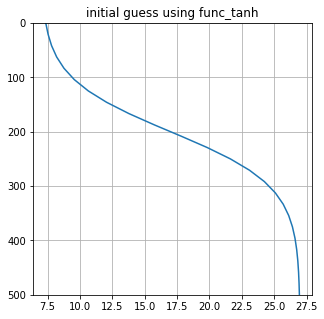

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.set_title('initial guess using func_tanh')
ax.plot(dz,z)
ax.set_ylim(500,0)
ax.grid()

In [5]:
popt, pcov = curve_fit(func_tanh, np.array([0,100,d,400, 500]), np.array([8.,8.5,17,25,28]),p0=[a, b, c ,d])

In [6]:
print('a = {}, b = {}, c = {}, and d = {}'.format(popt[0],popt[1],popt[2],popt[3]))

a = 17.162524664303458, b = 9.376701627956924, c = -0.13747974043913866, and d = 201.55099502077113


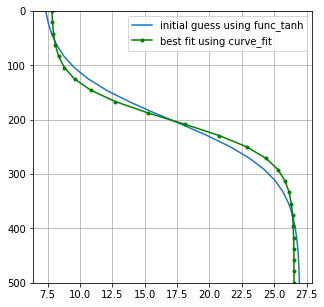

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(dz, z, label='initial guess using func_tanh')
ax.plot(func_tanh(z, *popt), z, 'g.-', label='best fit using curve_fit')
ax.legend()
ax.set_ylim(500,0)
ax.grid()

In [8]:
# Let's truncate the array using 2 decimal digits
dz_best_fit = func_tanh(z, *popt).round(decimals=2)
dz_best_fit

array([ 7.84,  7.88,  7.96,  8.1 ,  8.35,  8.81,  9.58, 10.85, 12.75,
       15.26, 18.09, 20.76, 22.89, 24.37, 25.29, 25.84, 26.15, 26.33,
       26.42, 26.48, 26.51, 26.52, 26.53, 26.53, 26.54])

In [9]:
dz_best_fit.cumsum()

array([  7.84,  15.72,  23.68,  31.78,  40.13,  48.94,  58.52,  69.37,
        82.12,  97.38, 115.47, 136.23, 159.12, 183.49, 208.78, 234.62,
       260.77, 287.1 , 313.52, 340.  , 366.51, 393.03, 419.56, 446.09,
       472.63])

In [10]:
dz_best_fit.cumsum()[-1].round(decimals=2)

472.63

### Assure that $\sum{dz}$ = MAXIMUM DEPT

In [11]:
dz_offset = (dz_best_fit.cumsum()[-1] - h_max).round(decimals=4)
dz_offset

-27.37

### Deflate the bottom-most five levels by dz_offset/5.

In [12]:
dz_best_fit[:] = (dz_best_fit[:] - dz_offset/nk).round(decimals=2)

In [13]:
dz_best_fit.cumsum()[-1]

499.88000000000005

## Find sigma2

In [14]:
# initial guesses
sigma_sur = 20 #29.9
sigma_bot = 34.
dsigma = sigma_bot - sigma_sur
a =  31.8 #sigma_sur + 0.5 * dsigma   # transitional
b  = dsigma  #(sigma_bot - sigma_sur)
c = -b/500.  # maximum slope
#d = 250.      # depth where transition should be applied
d = 250
z = np.linspace(0,h_max, nk+1) # note + 1, since sigma2 is at interaces
sigma2 = func_tanh(z,a,b,c,d)

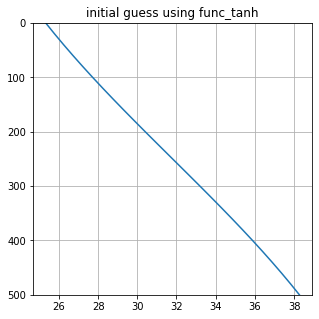

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.set_title('initial guess using func_tanh')
ax.plot(sigma2,z)
ax.set_ylim(500,0)
ax.grid()

In [16]:
popt, pcov = curve_fit(func_tanh, np.array([0,50,d,450, 500]), 
                       np.array([sigma_sur,sigma_sur+0.25,a,sigma_bot-0.25,sigma_bot]),p0=[a, b, c ,d])

In [17]:
print('a = {}, b = {}, c = {}, and d = {}'.format(popt[0],popt[1],popt[2],popt[3]))

a = 26.89314939098554, b = -6.989254428220047, c = -0.09442469754407648, and d = 185.52703648348358


In [18]:
func_tanh(z, *popt)

array([19.99625675, 20.06170442, 20.17263086, 20.35896168, 20.66729303,
       21.16505247, 21.93742447, 23.06523437, 24.57398908, 26.37222844,
       28.24260096, 29.93167223, 31.273169  , 32.23402953, 32.87248091,
       33.27581159, 33.52253477, 33.67049691, 33.75817853, 33.80977117,
       33.84000219, 33.85767289, 33.86798702, 33.87400219, 33.87750851,
       33.87955181])

In [19]:
sigma2_linear = np.linspace(29.2, 34, nk+1)

In [29]:
sigma2_linear[2]-sigma2_linear[1]

0.19200000000000017

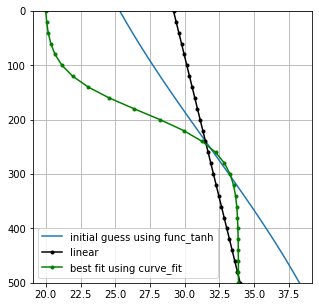

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.plot(sigma2, z, label='initial guess using func_tanh')
ax.plot(sigma2_linear, z, 'k.-', label='linear')
ax.plot(func_tanh(z, *popt), z, 'g.-', label='best fit using curve_fit')
ax.legend()
ax.set_ylim(500,0)
ax.grid()

In [21]:
# Let's truncate the array using 2 decimal digits
sigma2_best_fit = func_tanh(z, *popt).round(decimals=3)

In [22]:
sigma_sur = 28.9
sigma_bot = 34.

In [23]:
#sigma2_best_fit[0:5] = np.linspace(10, 28.5, 5)

In [24]:
#sigma2_best_fit[6::] = np.linspace(31.8, 34.5, 45)

In [25]:
#sigma2_best_fit = np.linspace(31.8, 34.5, 51)

In [26]:
from datetime import datetime 
now=datetime.now()
print(now)

path_out = '/glade/work/gmarques/Projects/LBD/INPUT/'

si_da = xr.DataArray(sigma2_linear+1000.0,
             dims=["interfaces"],
            attrs={"units":"kg/m^3","long_name":"Interface target potential density referenced to 2000db"})
dz_da = xr.DataArray(dz_best_fit,
                     dims=["layers"],
                     attrs={"units":"m","long_name":"z* coordinate level thickness"})

#dz_da = xr.DataArray(np.ones(nk)*10.,
#                     dims=["layers"],
#                     attrs={"units":"m","long_name":"z* coordinate level thickness"})

dz_max = xr.DataArray(np.ones(nk)*20.,
                     dims=["layers"],
                     attrs={"units":"m","long_name":"maximum layer thickness"})

ds_out = xr.Dataset()
ds_out['dz'] = dz_da
ds_out['dz_max'] = dz_max
ds_out['sigma2'] = si_da
ds_out.attrs={'history':'Created '+str(now)+' with make_hycom_LBD.ipynb'}

ds_out

2020-12-16 11:22:11.811271


<xarray.Dataset>
Dimensions:  (interfaces: 26, layers: 25)
Dimensions without coordinates: interfaces, layers
Data variables:
    dz       (layers) float64 8.93 8.97 9.05 9.19 ... 27.61 27.62 27.62 27.63
    dz_max   (layers) float64 20.0 20.0 20.0 20.0 20.0 ... 20.0 20.0 20.0 20.0
    sigma2   (interfaces) float64 1.029e+03 1.029e+03 ... 1.034e+03 1.034e+03
Attributes:
    history:  Created 2020-12-16 11:22:11.811271 with make_hycom_LBD.ipynb

In [27]:
ds_out.to_netcdf(path_out+'hycom1_{}_500m.nc'.format(nk))